# Analisis Hiperespectral de la Data

Este programa sirvio de base para los análisis realizados con las imagenes posteriormente

Se cargan las librerias que se usaron en el desarrollo

In [14]:
from spectral import imshow, view_cube
import spectral
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import Series,DataFrame
# Si no agrega esta línea, debe agregar plt.show cada vez que se muestra la imagen
%matplotlib inline
import matplotlib.image as mpimg
import os
import cv2
import re

import pandas as pd
import PIL
from PIL import Image
import random
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


Se cargan las imagenes por medio de "envi" desde el directorio donde están las mismas y se
convierten en matrices

In [15]:
imghdr1 = envi.open('Hiperimagenes10/train/negativo/030653-20x-roi2.hdr', 'Hiperimagenes10/train/negativo/030653-20x-roi2.raw')
imghdr2 = envi.open('Hiperimagenes10/train/negativo/030653-20x-roi3.hdr', 'Hiperimagenes10/train/negativo/030653-20x-roi3.raw')
imghdr3 = envi.open('Hiperimagenes10/train/negativo/030653-20x-roi4.hdr', 'Hiperimagenes10/train/negativo/030653-20x-roi4.raw')
imghdr4 = envi.open('Hiperimagenes10/train/negativo/030653-20x-roi5.hdr', 'Hiperimagenes10/train/negativo/030653-20x-roi5.raw')
imghdr5 = envi.open('Hiperimagenes10/train/negativo/030979-20x-roi4.hdr', 'Hiperimagenes10/train/negativo/030979-20x-roi4.raw')
imghdr6 = envi.open('Hiperimagenes10/train/positivo/030406-20x-roi6.hdr', 'Hiperimagenes10/train/positivo/030406-20x-roi6.raw')
imghdr7 = envi.open('Hiperimagenes10/train/positivo/030406c_2-20x-roi1.hdr', 'Hiperimagenes10/train/positivo/030406c_2-20x-roi1.raw')
imghdr8 = envi.open('Hiperimagenes10/train/positivo/030406c_2-20x-roi2.hdr', 'Hiperimagenes10/train/positivo/030406c_2-20x-roi2.raw')
imghdr9 = envi.open('Hiperimagenes10/train/positivo/030406c_2-20x-roi5.hdr', 'Hiperimagenes10/train/positivo/030406c_2-20x-roi5.raw')
imghdr10 = envi.open('Hiperimagenes10/train/positivo/030406c-20x-roi1.hdr', 'Hiperimagenes10/train/positivo/030406c-20x-roi1.raw')
imghdr11 = envi.open('Hiperimagenes10/train/positivo/040037-20x-roi7.hdr', 'Hiperimagenes10/train/positivo/040037-20x-roi7.raw')
imghdr12 = envi.open('Hiperimagenes10/train/positivo/040037-20x-roi8.hdr', 'Hiperimagenes10/train/positivo/040037-20x-roi8.raw')
imghdr13 = envi.open('Hiperimagenes10/train/positivo/040037-20x-roi9.hdr', 'Hiperimagenes10/train/positivo/040037-20x-roi9.raw')
imghdr14 = envi.open('Hiperimagenes10/train/positivo/040037-20x-roi10.hdr', 'Hiperimagenes10/train/positivo/040037-20x-roi10.raw')
imghdr15 = envi.open('Hiperimagenes10/train/positivo/040579-20x-roi3.hdr', 'Hiperimagenes10/train/positivo/040579-20x-roi3.raw')
imghdr16 = envi.open('Hiperimagenes10/test/negativo/040579-20x-roi9.hdr', 'Hiperimagenes10/test/negativo/040579-20x-roi9.raw')
imghdr17 = envi.open('Hiperimagenes10/test/negativo/041602-20x-roi4.hdr', 'Hiperimagenes10/test/negativo/041602-20x-roi4.raw')
imghdr18 = envi.open('Hiperimagenes10/test/negativo/041602-20x-roi5.hdr', 'Hiperimagenes10/test/negativo/041602-20x-roi5.raw')
imghdr19 = envi.open('Hiperimagenes10/test/negativo/041602-20x-roi9.hdr', 'Hiperimagenes10/test/negativo/041602-20x-roi9.raw')
imghdr20 = envi.open('Hiperimagenes10/test/positivo/030406-20x-roi1.hdr', 'Hiperimagenes10/test/positivo/030406-20x-roi1.raw')
imghdr21 = envi.open('Hiperimagenes10/test/positivo/030406-20x-roi2.hdr', 'Hiperimagenes10/test/positivo/030406-20x-roi2.raw')
imghdr22 = envi.open('Hiperimagenes10/test/positivo/030968-20x-roi2.hdr', 'Hiperimagenes10/test/positivo/030968-20x-roi2.raw')
imghdr23 = envi.open('Hiperimagenes10/test/positivo/030968-20x-roi3.hdr', 'Hiperimagenes10/test/positivo/030968-20x-roi3.raw')

imghdr1_nparr = np.array(imghdr1.load())
imghdr2_nparr = np.array(imghdr2.load())
imghdr3_nparr = np.array(imghdr3.load())
imghdr4_nparr = np.array(imghdr4.load())
imghdr5_nparr = np.array(imghdr5.load())
imghdr6_nparr = np.array(imghdr6.load())
imghdr7_nparr = np.array(imghdr7.load())
imghdr8_nparr = np.array(imghdr8.load())
imghdr9_nparr = np.array(imghdr9.load())
imghdr10_nparr = np.array(imghdr10.load())
imghdr11_nparr = np.array(imghdr11.load())
imghdr12_nparr = np.array(imghdr12.load())
imghdr13_nparr = np.array(imghdr13.load())
imghdr14_nparr = np.array(imghdr14.load())
imghdr15_nparr = np.array(imghdr15.load())
imghdr16_nparr = np.array(imghdr16.load())
imghdr17_nparr = np.array(imghdr17.load())
imghdr18_nparr = np.array(imghdr18.load())
imghdr19_nparr = np.array(imghdr19.load())
imghdr20_nparr = np.array(imghdr20.load())
imghdr21_nparr = np.array(imghdr21.load())
imghdr22_nparr = np.array(imghdr22.load())
imghdr23_nparr = np.array(imghdr23.load())


Se salvan las imagenes cargadas en un directorio especifico.   Positivos y Negativos en distintos
directorios

In [3]:
np.save('datos10/train/negativo/hdr1.npy',imghdr1_nparr)
np.save('datos10/train/negativo/hdr2.npy',imghdr2_nparr)
np.save('datos10/train/negativo/hdr3.npy',imghdr3_nparr)
np.save('datos10/train/negativo/hdr4.npy',imghdr4_nparr)
np.save('datos10/train/negativo/hdr5.npy',imghdr5_nparr)
np.save('datos10/train/positivo/hdr6.npy',imghdr6_nparr)
np.save('datos10/train/positivo/hdr7.npy',imghdr7_nparr)
np.save('datos10/train/positivo/hdr8.npy',imghdr8_nparr)
np.save('datos10/train/positivo/hdr9.npy',imghdr9_nparr)
np.save('datos10/train/positivo/hdr10.npy',imghdr10_nparr)
np.save('datos10/train/positivo/hdr11.npy',imghdr11_nparr)
np.save('datos10/train/positivo/hdr12.npy',imghdr12_nparr)
np.save('datos10/train/positivo/hdr13.npy',imghdr13_nparr)
np.save('datos10/train/positivo/hdr14.npy',imghdr14_nparr)
np.save('datos10/train/positivo/hdr15.npy',imghdr15_nparr)
np.save('datos10/test/negativo/hdr16.npy',imghdr16_nparr)
np.save('datos10/test/negativo/hdr17.npy',imghdr17_nparr)
np.save('datos10/test/negativo/hdr18.npy',imghdr18_nparr)
np.save('datos10/test/negativo/hdr19.npy',imghdr19_nparr)
np.save('datos10/test/positivo/hdr20.npy',imghdr20_nparr)
np.save('datos10/test/positivo/hdr21.npy',imghdr21_nparr)
np.save('datos10/test/positivo/hdr22.npy',imghdr22_nparr)
np.save('datos10/test/positivo/hdr23.npy',imghdr23_nparr)


Se evaluan datos aleatoriamente

In [16]:
imghdr1_nparr.shape

(1024, 1280, 60)

In [17]:
np.amax(imghdr23_nparr)

11728.0

In [18]:
np.amax(imghdr15_nparr)

18608.0

In [19]:
np.amin(imghdr1_nparr)

1440.0

Se tomen 10 matrices y se realiza la promediación poe frecuencia

In [20]:
V10=imghdr10_nparr.mean(axis=1)
V1=imghdr1_nparr.mean(axis=1)
V2=imghdr2_nparr.mean(axis=1)
V3=imghdr3_nparr.mean(axis=1)
V4=imghdr4_nparr.mean(axis=1)
V5=imghdr5_nparr.mean(axis=1)
V6=imghdr6_nparr.mean(axis=1)
V7=imghdr7_nparr.mean(axis=1)
V8=imghdr8_nparr.mean(axis=1)
V9=imghdr9_nparr.mean(axis=1)


In [21]:
V5.shape


(1024, 60)

In [22]:
VE10=V10.mean(axis=0)
VE1=V1.mean(axis=0)
VE2=V2.mean(axis=0)
VE3=V3.mean(axis=0)
VE4=V4.mean(axis=0)
VE5=V5.mean(axis=0)
VE6=V6.mean(axis=0)
VE7=V7.mean(axis=0)
VE8=V8.mean(axis=0)
VE9=V9.mean(axis=0)

In [23]:
VE5.shape

(60,)

Se evaluan algunos vectores obtenidos

In [37]:
print(VE8)

[1843.648  1842.2117 1872.2633 1909.2175 1964.0635 2049.483  2178.7688
 2346.113  2538.3281 2746.0303 2938.0767 3091.0393 3192.4639 3294.7766
 3485.6377 3770.5806 4199.4287 4707.907  5244.469  5710.8965 5941.576
 5965.44   5939.9033 6000.5586 6211.751  6403.285  6672.9463 6834.4326
 6647.3394 6189.9893 5660.0464 5302.0674 4988.0312 4776.1084 4751.8057
 4799.4365 4942.721  5034.42   5176.9775 5040.3164 4590.157  3985.003
 3436.3867 3023.9258 2717.1702 2556.247  2442.6724 2330.0063 2216.3608
 2113.38   2014.8914 1908.813  1814.1926 1748.6484 1708.2678 1683.2488
 1669.7783 1661.6362 1652.6515 1642.7607]


In [42]:
print(VE8[39],VE7[39],VE6[39],VE9[39],VE10[39])

5040.3164 5033.2925 6861.248 5031.336 4719.9346


In [43]:
print(VE3[39],VE1[39],VE2[39],VE4[39],VE5[39])

6983.4053 6700.7407 6926.7007 7034.7246 4710.0244


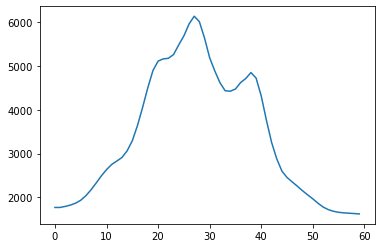

In [24]:
band_x=np.linspace(0,59)
plt.plot(VE10)

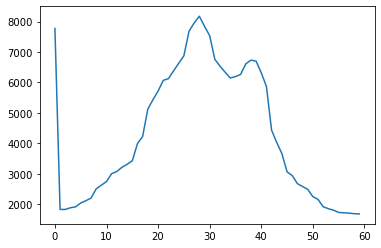

In [25]:
band_x=np.linspace(0,59)
plt.plot(VE1)

Se grafican las 10 imagenes

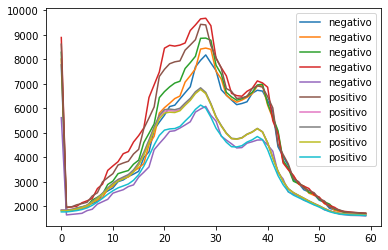

In [32]:
band_x=np.linspace(0,59)
plt.plot(VE1, label='negativo')
plt.plot(VE2, label='negativo')
plt.plot(VE3, label='negativo')
plt.plot(VE4, label='negativo')
plt.plot(VE5,label='negativo')
plt.plot(VE6,label='positivo')
plt.plot(VE7, label='positivo')
plt.plot(VE8, label='positivo')
plt.plot(VE9, label='positivo')
plt.plot(VE10, label='positivo')
plt.legend()
#plt.show()

Tomando las imagenes negativas (sin cancer)

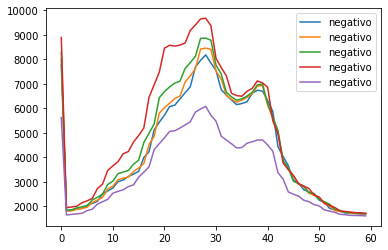

In [33]:
band_x=np.linspace(0,59)
plt.plot(VE1, label='negativo')
plt.plot(VE2, label='negativo')
plt.plot(VE3, label='negativo')
plt.plot(VE4, label='negativo')
plt.plot(VE5,label='negativo')
#plt.plot(VE6,label='positivo')
#plt.plot(VE7, label='positivo')
#plt.plot(VE8, label='positivo')
#plt.plot(VE9, label='positivo')
#plt.plot(VE10, label='positivo')
plt.legend()


Tomando las imagenes positivas (con cancer)

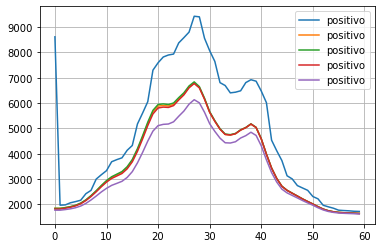

In [36]:
band_x=np.linspace(0,59)
#plt.plot(VE1, label='negativo')
#plt.plot(VE2, label='negativo')
#plt.plot(VE3, label='negativo')
#plt.plot(VE4, label='negativo')
#plt.plot(VE5,label='negativo')
plt.plot(VE6,label='positivo')
plt.plot(VE7, label='positivo')
plt.plot(VE8, label='positivo')
plt.plot(VE9, label='positivo')
plt.plot(VE10, label='positivo')
plt.legend()
plt.grid()
